In [ ]:
Get the numerical variables from our dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_num = pd.read_csv('C:/Users/JC88Main/Week4/Day1/Lab1/lab-cleaning-numerical-data-master/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data_num = data_num.select_dtypes(np.number)
data_num.columns = [column.lower() for column in data_num.columns]
data_num.columns = data_num.columns.str.replace(" ","_")
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

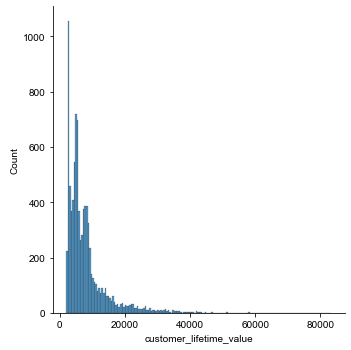

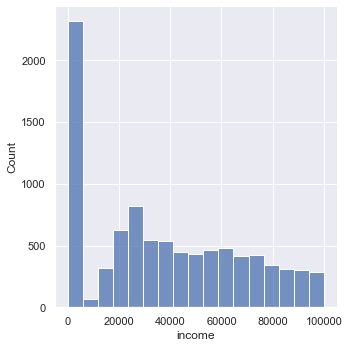

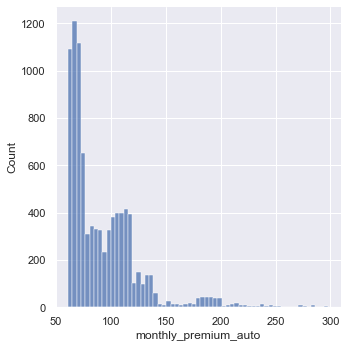

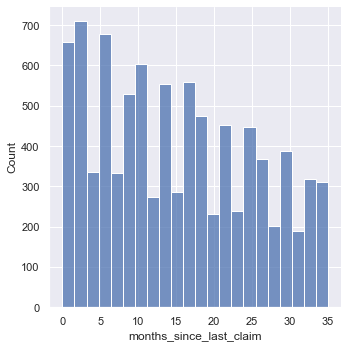

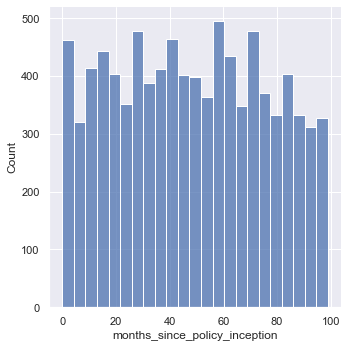

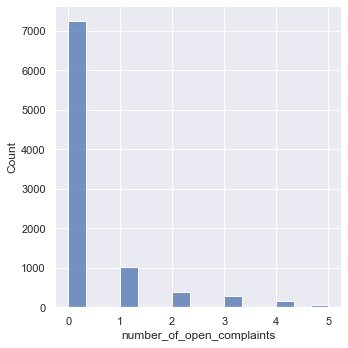

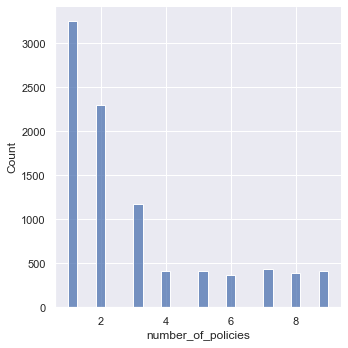

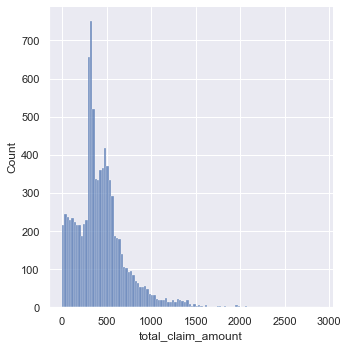

In [5]:
for col in data_num.columns:
    sns.displot(data=data_num,x=col)
    sns.set(rc = {'figure.figsize':(8,6)})
    plt.show()

In [ ]:
#Almost all histograms show an exponential distribution 
#except "Months_Since_Policy_Inception" that almost looks like a normal distribution

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [6]:
#Log transformation.

def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

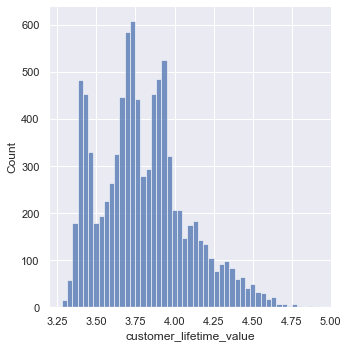

In [7]:
data_num.customer_lifetime_value = data_num.customer_lifetime_value.apply(log_transfom_clean1)
sns.displot(data=data_num,x=data_num.customer_lifetime_value)

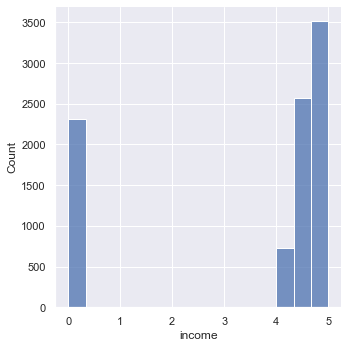

In [8]:
data_num.income = data_num.income.apply(log_transfom_clean1)
sns.displot(data=data_num,x=data_num.income)

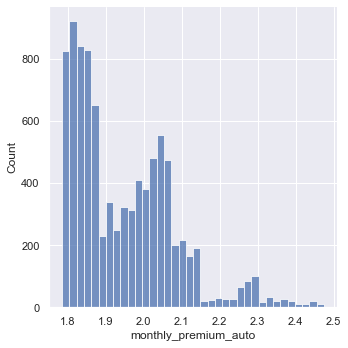

In [9]:
data_num.monthly_premium_auto = data_num.monthly_premium_auto.apply(log_transfom_clean1)
sns.displot(data=data_num,x=data_num.monthly_premium_auto)

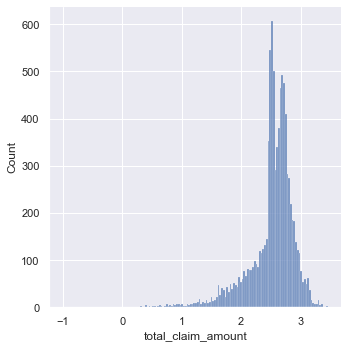

In [10]:
data_num.total_claim_amount = data_num.total_claim_amount.apply(log_transfom_clean1)
sns.displot(data=data_num,x=data_num.total_claim_amount)

In [11]:
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,3.441462,4.750308,1.838849,32,5,0,1,2.585248
1,3.843827,0.000000,1.973128,13,42,0,8,3.053641
2,4.110166,4.688126,2.033424,18,38,0,2,2.753179
3,3.883426,0.000000,2.025306,18,65,0,7,2.724179
4,3.449277,4.641831,1.863323,12,44,0,1,2.140291


In [12]:
#From log transformation we can check that total_claim_amount has improved, looking closer to a normal distribution.